In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [21]:
dt=pd.read_csv("delivery_time.csv")

In [24]:
dt

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [25]:
dt.shape

(21, 2)

In [18]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [26]:
dt.columns

Index(['DeliveryTime', 'SortingTime'], dtype='object')

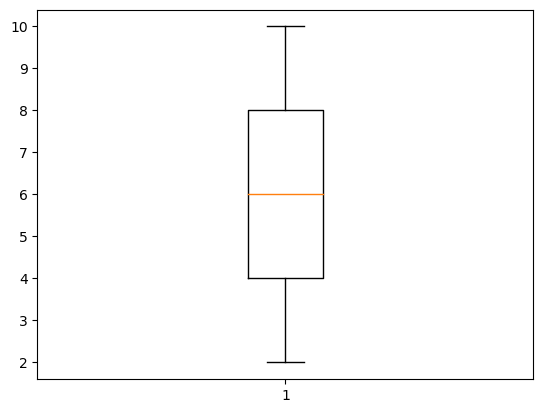

In [27]:
plt.boxplot(dt.SortingTime)
plt.show() 

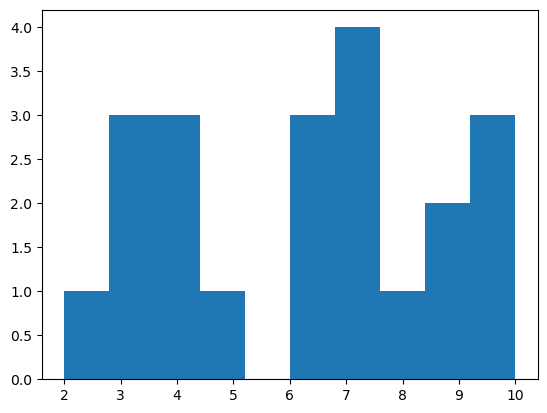

In [28]:
plt.hist(dt.SortingTime)
plt.show() 

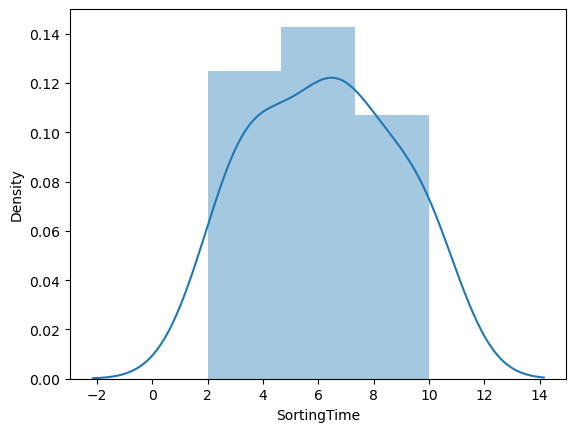

In [32]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.distplot(dt['SortingTime']) 
plt.show() 

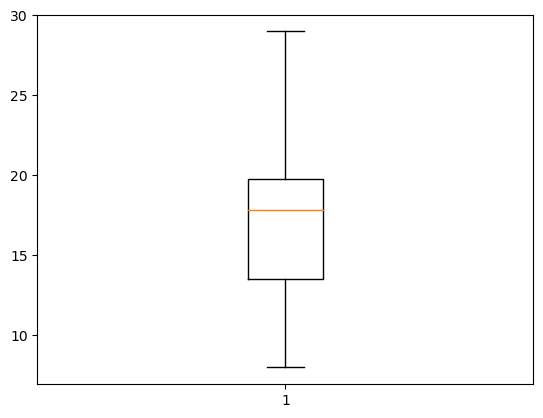

In [29]:
plt.boxplot(dt.DeliveryTime)
plt.show() 

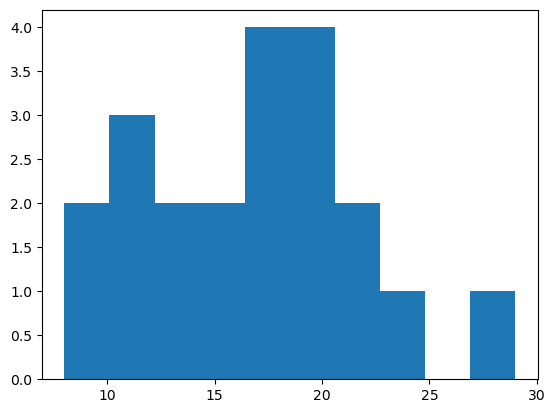

In [30]:
plt.hist(dt.DeliveryTime)
plt.show() 

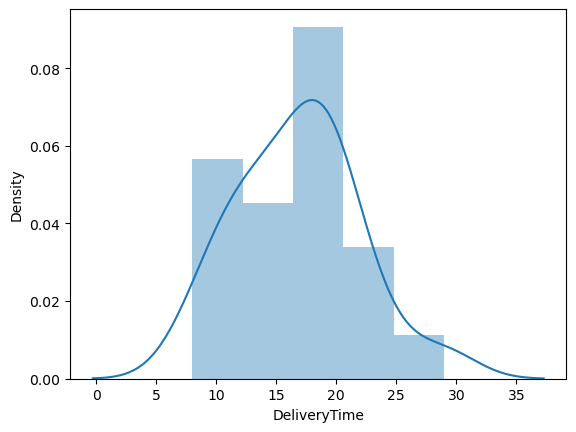

In [31]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.distplot(dt['DeliveryTime']) 
plt.show() 

Text(0.5, 1.0, 'ScatterPlot')

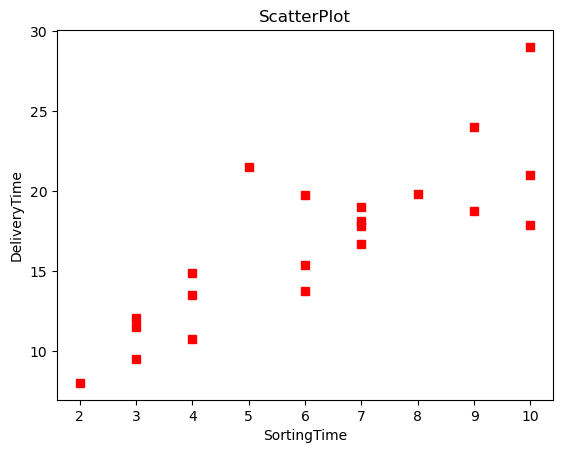

In [33]:
plt.plot(dt.SortingTime,dt.DeliveryTime,"rs")
plt.xlabel("SortingTime")
plt.ylabel("DeliveryTime")
plt.title("ScatterPlot")   

In [34]:
dt.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


In [35]:
import statsmodels.formula.api as smf
model=smf.ols("DeliveryTime~SortingTime",data=dt).fit()
model.params 

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [36]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        09:14:51   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [38]:
pred = model.predict(dt.SortingTime)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [39]:
model.resid_pearson

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [40]:
rmse_lin = np.sqrt(np.mean((np.array(dt['DeliveryTime'])-np.array(pred))**2))
rmse_lin

2.7916503270617654

In [72]:
pred.corr(dt.DeliveryTime)

0.8259972607955325

Text(0, 0.5, 'Delivery Time')

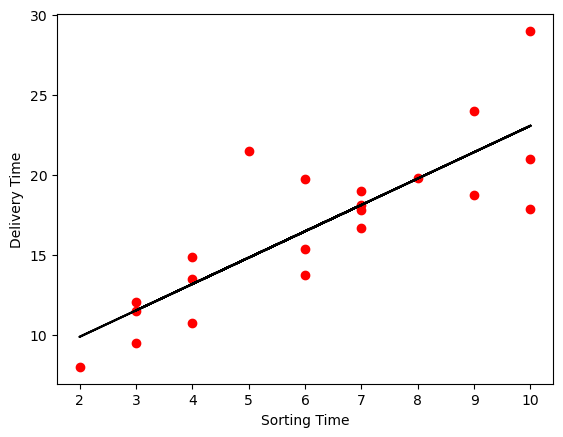

In [41]:
plt.scatter(x=dt['SortingTime'],y=dt['DeliveryTime'],color='red')
plt.plot(dt['SortingTime'],pred,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time') 

In [42]:
model2 = smf.ols('DeliveryTime~np.log(SortingTime)',data=dt).fit()

In [43]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           2.64e-06
Time:                        09:23:07   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
pred2 = model2.predict(pd.DataFrame(dt['SortingTime'])) 
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [45]:
rmse_log = np.sqrt(np.mean((np.array(dt['DeliveryTime'])-np.array(pred2))**2))
rmse_log

2.7331714766820663

In [68]:
pred2.corr(dt.DeliveryTime)

0.8339325279256244

Text(0, 0.5, 'Delivery Time')

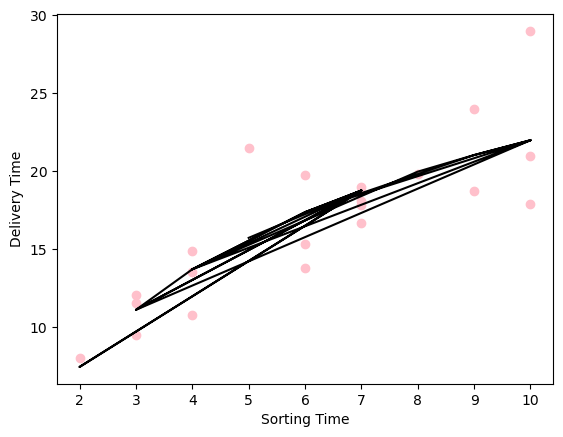

In [46]:
plt.scatter(x=dt['SortingTime'],y=dt['DeliveryTime'],color='pink')
plt.plot(dt['SortingTime'],pred2,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time') 

In [48]:
model3 = smf.ols('np.log(DeliveryTime)~SortingTime',data=dt).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Wed, 22 Feb 2023   Prob (F-statistic):           1.59e-06
Time:                          09:28:36   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
pred_log= model3.predict(pd.DataFrame(dt['SortingTime']))
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [50]:
pred3=np.exp(pred_log)  # as we have used log(DeliveryTime) in preparing model so we need to convert it back
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [52]:
rmse_exp = np.sqrt(np.mean((np.array(dt['DeliveryTime'])-np.array(pred3))**2)) 
rmse_exp 

2.940250323056201

In [67]:
pred3.corr(dt.DeliveryTime)

0.8085780108289262

Text(0, 0.5, 'Delivery Time')

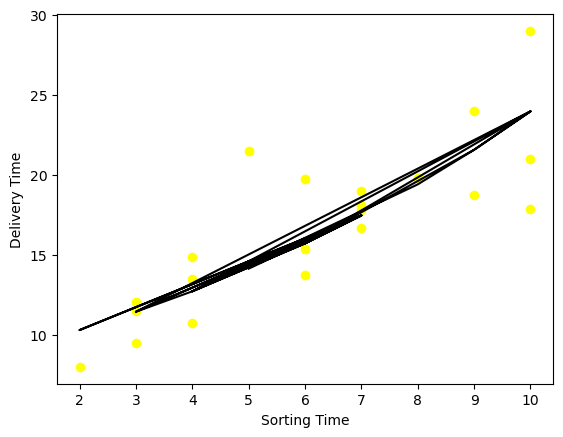

In [53]:
plt.scatter(x=dt['SortingTime'],y=dt['DeliveryTime'],color='yellow')
plt.plot(dt['SortingTime'],pred3,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time') 

In [54]:
dt_resid = model3.resid_pearson 
dt_resid

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

Text(0, 0.5, 'Standardized Residual')

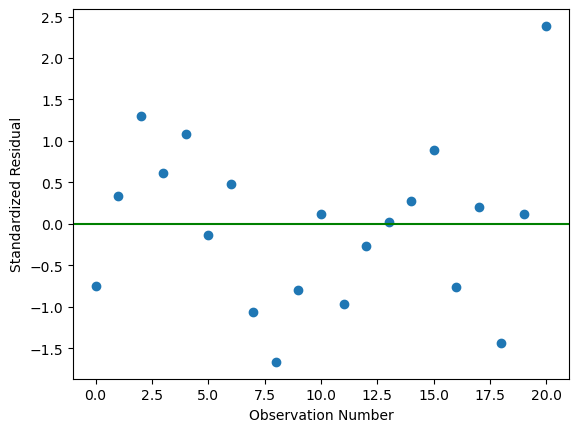

In [55]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual") 

Text(0, 0.5, 'Actual')

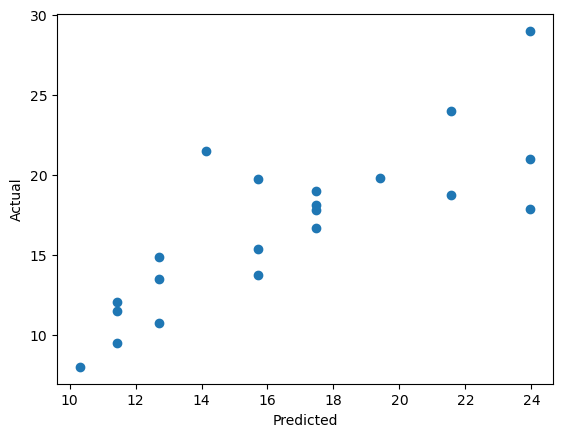

In [56]:
plt.scatter(x=pred3,y=dt.DeliveryTime)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [59]:
dt["St_Sq"] = dt.SortingTime*dt.SortingTime
dt

,DeliveryTime,SortingTime,Waist_Sq,St_Sq
0,21.00,10,100,100
1,13.50,4,16,16
2,19.75,6,36,36
3,24.00,9,81,81
4,29.00,10,100,100
5,15.35,6,36,36
6,19.00,7,49,49
7,9.50,3,9,9
8,17.90,10,100,100
9,18.75,9,81,81


In [60]:
model4 = smf.ols("np.log(DeliveryTime)~SortingTime+St_Sq",data=dt).fit()

In [61]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.765
Model:                              OLS   Adj. R-squared:                  0.739
Method:                   Least Squares   F-statistic:                     29.28
Date:                  Wed, 22 Feb 2023   Prob (F-statistic):           2.20e-06
Time:                          09:48:05   Log-Likelihood:                 9.9597
No. Observations:                    21   AIC:                            -13.92
Df Residuals:                        18   BIC:                            -10.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6997      0.228      7.441      0.000       1.220       2.180
SortingTime     0.2659      0.080      3.315      0.004       0.097       0.434
St_Sq          -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
pred_quad = model4.predict(dt)
pred4=np.exp(pred_quad)  # as we have used log(DeliveryTime) in preparing model so we need to convert it back
pred4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [64]:
rmse4 = np.sqrt(np.mean((np.array(dt['DeliveryTime'])-np.array(pred4))**2))
rmse4 

2.7990419887409272

In [66]:
pred4.corr(dt.DeliveryTime)

0.8258882749910925

Text(0, 0.5, 'Delivery Time')

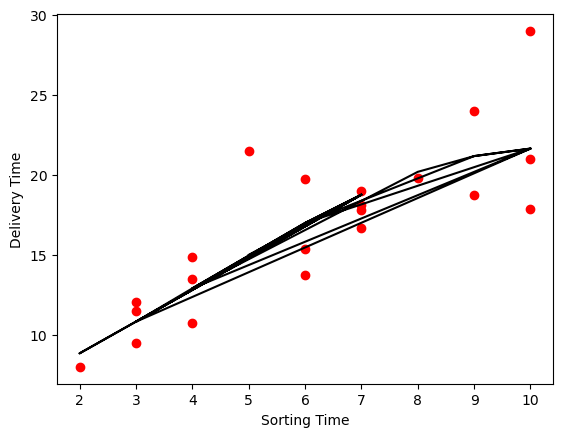

In [65]:
plt.scatter(x=dt['SortingTime'],y=dt['DeliveryTime'],color='red')
plt.plot(dt['SortingTime'],pred4,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time') 

In [73]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse4"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse4]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared])}
table=pd.DataFrame(data)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,2.791650,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_exp,2.940250,0.710948
3,rmse4,2.799042,0.764867
